<a href="https://colab.research.google.com/github/jarinari/Algorithmic-Trading-Plugins/blob/master/monkeys.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#INTRODUCCIÓN

La hipótesis es que en un activo con sesgo tendencial se gana dinero a largo plazo incluso por azar.

Para comprobarlo se utilizarán las cotizaciones diarias de los últimos 30 años del SP500 y se simularán 1000 "monos tirando dardos al azar".

Cada uno de los monos operará la mitad de los días y las operaciones durarán 1 día.

Comprobaremos cuantos de estos monos ganan dinero a largo plazo y si existen monos que superen al benchmark.

#ENTORNO

##LIBRERÍAS

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import random
import warnings
warnings.filterwarnings('ignore')

##FUNCIONES

In [ ]:
#FUNCIÓN PARA GENERAR MONOS

def mono(data):
  """
  Genera una estrategia de "monos" basada en datos de entrada.

  Args:
    data (pandas.DataFrame): Datos de entrada que contienen una columna "Returns".

  Returns:
    pandas.Series: Una serie que representa la estrategia generada por los "monos".
  """

  #Copiar los datos de entrada para evitar modificar el DataFrame original
  df = data.copy()

  #Crear lista para almacenar los índices seleccionados aleatoriamente
  indexes = []

  #Generar la mitad de la longitud de los datos redondeada
  for n in range(round(len(df) / 2)):
    #Seleccionar un índice aleatorio dentro del rango de la columna "Returns"
    rindex = random.randrange(len(df["Returns"]))
    indexes.append(rindex)

  #Obtener los índices únicos para evitar duplicados
  indexes = np.unique(indexes)

  #Inicializar la columna "Strategy" con valores de 0
  df["Strategy"] = 0

  #Asignar los valores de "Returns" a la columna "Strategy" en los índices seleccionados
  for i in indexes:
    df.iloc[i, -1] = df["Returns"][i]

  #Calcular la suma acumulativa de la columna "Strategy"
  df["Strategy"] = df["Strategy"].cumsum()

  return df["Strategy"]

#DATASET

Usamos la librería yahoo_finance para descargar los datos históricos del SP500.

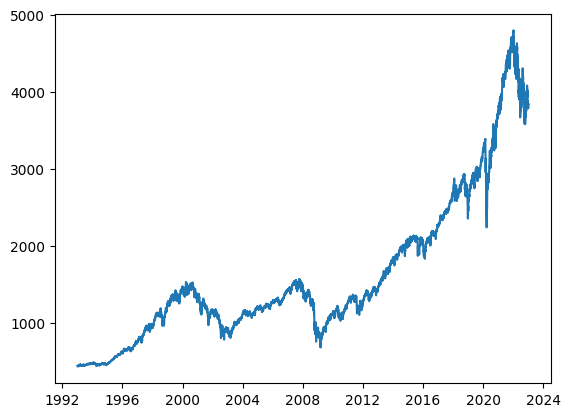

In [ ]:
#OBTENCIÓN DE LAS COTIZACIONES HISTÓRICAS

#Descargar datos
data = yf.download("^GSPC", start="1993-01-01", end="2023-01-01", progress=False)

#Calcular retornos
data["Returns"] = data["Close"].pct_change()*100
data.dropna()

#Graficar evolución de la cotización
plt.plot(data["Close"])
plt.show()

#MONOS

In [ ]:
#GENERACIÓN DE 1000 MONOS

#Generar monos
monos = []
for n in range(1000):
  monos.append(mono(data))

#Poner nombre a cada mono
names = []
for n in range(1000):
  names.append("S_"+str(n))

#Concatenar monos en un dataframe
df_monos = pd.concat(monos, axis=1)
df_monos.columns = names

df_monos

,S_0,S_1,S_2,S_3,S_4,S_5,S_6,S_7,S_8,S_9,...,S_990,S_991,S_992,S_993,S_994,S_995,S_996,S_997,S_998,S_999
Date,,,,,,,,,,,,,,,,,,,,,
1993-01-04,NaN,NaN,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,NaN,...,0.000000,0.000000,NaN,NaN,0.000000,NaN,NaN,0.000000,0.000000,0.000000
1993-01-05,-0.238874,-0.238874,0.000000,0.000000,0.000000,-0.238874,-0.238874,-0.238874,-0.238874,0.000000,...,0.000000,-0.238874,0.000000,-0.238874,-0.238874,-0.238874,-0.238874,-0.238874,0.000000,0.000000
1993-01-06,-0.197433,-0.238874,0.000000,0.000000,0.000000,-0.197433,-0.197433,-0.238874,-0.238874,0.041441,...,0.041441,-0.197433,0.041441,-0.197433,-0.197433,-0.238874,-0.238874,-0.197433,0.041441,0.000000
1993-01-07,-0.197433,-1.111096,0.000000,0.000000,-0.872222,-0.197433,-1.069655,-1.111096,-0.238874,0.041441,...,0.041441,-1.069655,0.041441,-0.197433,-1.069655,-1.111096,-1.111096,-0.197433,-0.830781,0.000000
1993-01-08,-0.197433,-1.501136,-0.390041,0.000000,-1.262263,-0.587474,-1.459696,-1.111096,-0.238874,0.041441,...,0.041441,-1.069655,0.041441,-0.197433,-1.459696,-1.111096,-1.501136,-0.587474,-1.220822,-0.390041
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,145.198211,113.593464,147.146291,146.268969,134.854133,163.240706,41.367716,-33.258507,143.580074,35.718223,...,75.130657,143.808275,127.023503,117.898866,88.403581,144.032494,157.724629,119.071664,173.156384,255.428946
2022-12-27,145.198211,113.188502,146.741328,145.864007,134.854133,163.240706,40.962754,-33.258507,143.580074,35.718223,...,75.130657,143.808275,126.618541,117.898866,88.403581,143.627532,157.319667,118.666702,173.156384,255.428946
2022-12-28,145.198211,111.986438,146.741328,145.864007,134.854133,162.038642,40.962754,-33.258507,143.580074,35.718223,...,75.130657,143.808275,125.416477,116.696802,88.403581,143.627532,157.319667,117.464638,173.156384,254.226882


#BENCHMARK

El benchmark será el retorno diario acumulado del SP500 sin reinversión.

In [ ]:
#CÁLCULO DEL BENCHMARK

#Copiar el dataframe original
df = data.copy()

#Calcular retorno acumulado
df["Benchmark"] = df["Returns"].cumsum()

#RESULTADOS

##GRÁFICO

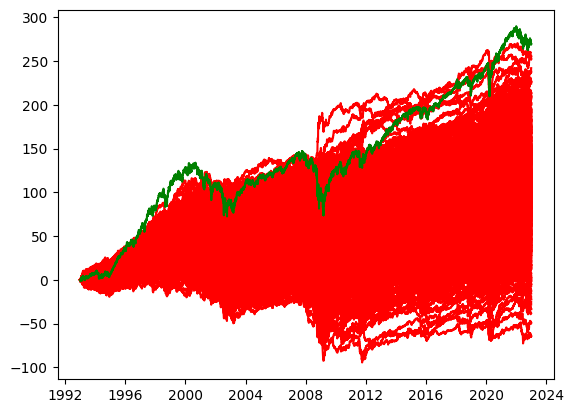

In [ ]:
#REPRESENTACIÓN GRÁFICA

#Graficar los monos y el benchmark
for n in range(1000):
  plt.plot(df_monos["S_"+str(n)], c="red")
plt.plot(df["Benchmark"], c="green")
plt.show()

##HISTOGRAMA

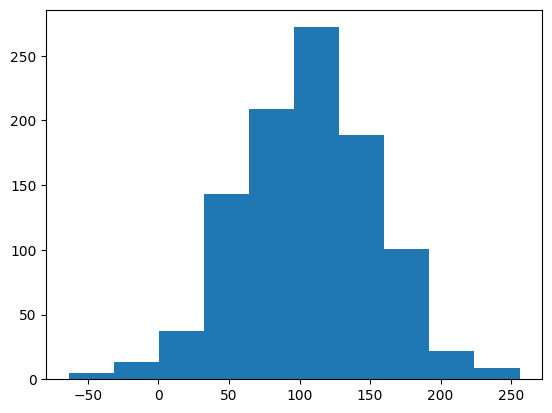

In [ ]:
#HISTOGRAMA DE CURVAS

#Generar histograma de los retornos acumulados de los monos
curvas = []
for n in range(1000):
  curvas.append(df_monos["S_"+str(n)][-1])

plt.hist(curvas)
plt.show()

##PORCENTAJES

In [ ]:
#CÁLCULO DE MONOS QUE SUPERAN AL BENCHMARK

#Calcular porcentaje de monos que superan al benchmark
winners = []
for curva in curvas:
  if curva>df["Benchmark"][-1]:
    winners.append(curva)

print("Monos que superan al bencharmk: ", len(winners)*100/1000, "%")

Monos que superan al bencharmk:  0.0 %


In [ ]:
#CÁLCULO DE MONOS QUE TIENEN PÉRDIDAS

#Calcular monos que tienen pérdidas
losers = []
for curva in curvas:
  if curva<0:
    losers.append(curva)

print("Monos que tienen pérdidas: ", len(losers)*100/1000, "%")

Monos que tienen pérdidas:  1.7 %


In [ ]:
#CÁLCULO DE MONOS QUE OBTIENEN BENEFICIOS
survivors = []
for curva in curvas:
  if curva>0:
    survivors.append(curva)

print("Monos que tienen beneficio: ", len(survivors)*100/1000, "%")

Monos que tienen beneficio:  98.3 %
